In [39]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import requests

In [40]:
import pandas as pd
yfdf_df=pd.read_csv("yfdf.csv",index_col='Date',parse_dates=True)
yfdf_df.head()

,BTC,XRP,ETH,LTC,DOGE,^GSPC
Date,,,,,,
2016-06-15,694.468994,0.006887,18.3543,5.23978,0.000313,2071.500000
2016-06-16,766.307983,0.006676,20.5886,5.66079,0.000335,2077.989990
2016-06-17,748.908997,0.006693,15.3768,5.59327,0.000321,2071.219971
2016-06-20,737.226013,0.006626,11.8395,5.29454,0.000323,2083.250000
2016-06-21,666.651978,0.006172,13.3067,4.82175,0.000307,2088.899902


In [100]:
yfdf_daily_return=yfdf_df.pct_change().dropna()
yfdf_daily_return.head()

,BTC,XRP,ETH,LTC,DOGE,^GSPC
Date,,,,,,
2016-06-16,0.103444,-0.030637,0.121732,0.080349,0.070288,0.003133
2016-06-17,-0.022705,0.002546,-0.253140,-0.011928,-0.041791,-0.003258
2016-06-20,-0.015600,-0.010010,-0.230041,-0.053409,0.006230,0.005808
2016-06-21,-0.095729,-0.068518,0.123924,-0.089298,-0.049536,0.002712
2016-06-22,-0.105806,0.052333,-0.015902,-0.188946,-0.133551,-0.001652


In [91]:
sharpe_ratios = ((yfdf_daily_return.mean()-yfdf_daily_return['^GSPC'].mean()) * 252) / (yfdf_daily_return.std() * np.sqrt(252))
sharpe_ratios

BTC      1.239711
XRP      1.188715
ETH      1.288892
LTC      1.017893
DOGE     1.281138
^GSPC    0.000000
dtype: float64

In [114]:
sharpe_ratios.hvplot(kind="bar", title="Sharpe Ratios",height=300, width=500, color='navy')

:Bars   [index]   (0)

In [53]:
covariance_BTC = yfdf_daily_return['BTC'].cov(yfdf_daily_return['^GSPC'])
covariance_BTC

9.82449910283582e-05

In [43]:
variance_BTC = yfdf_daily_return['BTC'].var()
variance_BTC

0.0023524455139935876

In [44]:
btc_beta=covariance / variance
btc_beta

0.04176291881956251

In [102]:
rolling_covariance_BTC = yfdf_daily_return['BTC'].rolling(window=30).cov(yfdf_daily_return['^GSPC'])
rolling_covariance_BTC.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of BTC Returns vs. S&P 500 Returns')

:Curve   [Date]   (0)

In [46]:
rolling_variance_BTC = yfdf_daily_return['^GSPC'].rolling(window=30).var()
rolling_variance_BTC.hvplot(figsize=(20, 10), title='Rolling 30-Day Variance of BTC Returns vs. S&P 500 Returns')

:Curve   [Date]   (^GSPC)

In [54]:
rolling_beta_BTC = rolling_covariance / rolling_variance
rolling_beta_BTC.hvplot(figsize=(20, 10), title='Rolling 30-Day Beta of BTC')

:Curve   [Date]   (0)

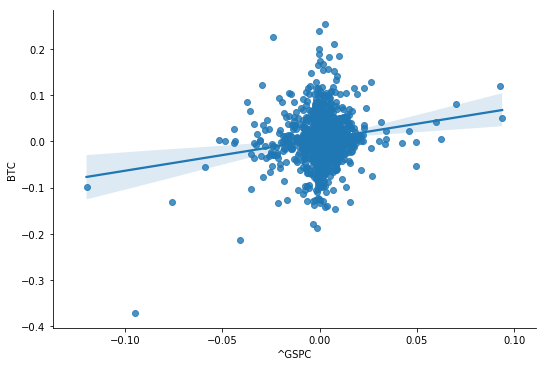

In [49]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='^GSPC', y='BTC', data=yfdf_daily_return, aspect=1.5, fit_reg=True)

In [55]:
covariance_DOGE = yfdf_daily_return['DOGE'].cov(yfdf_daily_return['^GSPC'])
covariance_DOGE

8.249092050244695e-05

In [56]:
variance_DOGE = yfdf_daily_return['DOGE'].var()
variance_DOGE

0.0167399132735172

In [58]:
Doge_beta=covariance / variance
Doge_beta

0.04176291881956251

In [59]:
rolling_covariance_DOGE = yfdf_daily_return['DOGE'].rolling(window=30).cov(yfdf_daily_return['^GSPC'])
rolling_covariance_DOGE.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of DOGE Returns vs. S&P 500 Returns')

:Curve   [Date]   (0)

In [60]:
rolling_variance_DOGE = yfdf_daily_return['^GSPC'].rolling(window=30).var()
rolling_variance_DOGE.hvplot(figsize=(20, 10), title='Rolling 30-Day Variance of DOGE Returns vs. S&P 500 Returns')

:Curve   [Date]   (^GSPC)

In [62]:
rolling_beta_DOGE = rolling_covariance / rolling_variance
rolling_beta_DOGE.hvplot(figsize=(20, 10), title='Rolling 30-Day Beta of DOGE')

:Curve   [Date]   (0)

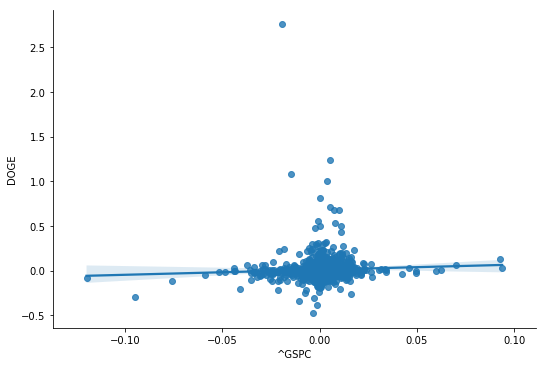

In [63]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='^GSPC', y='DOGE', data=yfdf_daily_return, aspect=1.5, fit_reg=True)

In [64]:
covariance_XRP = yfdf_daily_return['XRP'].cov(yfdf_daily_return['^GSPC'])
covariance_XRP

0.00014191165300780562

In [65]:
variance_XRP = yfdf_daily_return['XRP'].var()
variance_XRP

0.008947340690691906

In [66]:
XRP_beta=covariance / variance
XRP_beta

0.04176291881956251

In [67]:
rolling_covariance_XRP = yfdf_daily_return['XRP'].rolling(window=30).cov(yfdf_daily_return['^GSPC'])
rolling_covariance_DOGE.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of XRP Returns vs. S&P 500 Returns')

:Curve   [Date]   (0)

In [68]:
rolling_variance_XRP = yfdf_daily_return['^GSPC'].rolling(window=30).var()
rolling_variance_XRP.hvplot(figsize=(20, 10), title='Rolling 30-Day Variance of XRP Returns vs. S&P 500 Returns')

:Curve   [Date]   (^GSPC)

In [69]:
rolling_beta_XRP = rolling_covariance / rolling_variance
rolling_beta_XRP.hvplot(figsize=(20, 10), title='Rolling 30-Day Beta of XRP')

:Curve   [Date]   (0)

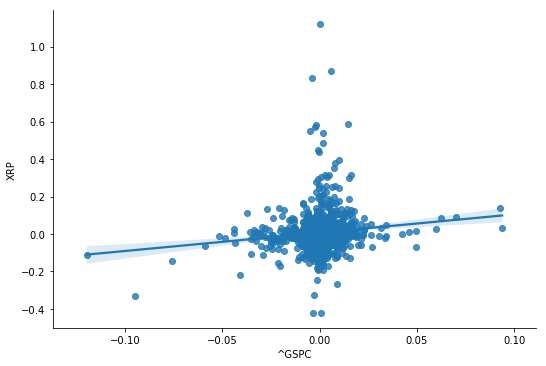

In [70]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='^GSPC', y='XRP', data=yfdf_daily_return, aspect=1.5, fit_reg=True)

In [83]:
covariance_ETH = yfdf_daily_return['ETH'].cov(yfdf_daily_return['^GSPC'])
covariance_ETH

0.00015112202401909244

In [84]:
variance_ETH = yfdf_daily_return['ETH'].var()
variance_ETH

0.005030313989806283

In [85]:
ETH_beta=covariance / variance
ETH_beta

0.04176291881956251

In [86]:
rolling_covariance_ETH = yfdf_daily_return['ETH'].rolling(window=30).cov(yfdf_daily_return['^GSPC'])
rolling_covariance_ETH.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of ETH Returns vs. S&P 500 Returns')

:Curve   [Date]   (0)

In [87]:
rolling_variance_ETH = yfdf_daily_return['^GSPC'].rolling(window=30).var()
rolling_variance_ETH.hvplot(figsize=(20, 10), title='Rolling 30-Day Variance of ETH Returns vs. S&P 500 Returns')

:Curve   [Date]   (^GSPC)

In [88]:
rolling_beta_ETH = rolling_covariance / rolling_variance
rolling_beta_ETH.hvplot(figsize=(20, 10), title='Rolling 30-Day Beta of ETH')

:Curve   [Date]   (0)

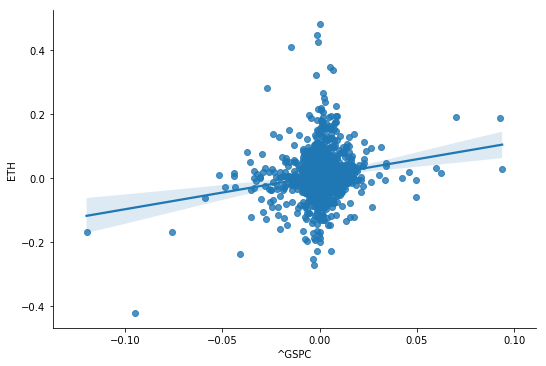

In [89]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='^GSPC', y='ETH', data=yfdf_daily_return, aspect=1.5, fit_reg=True)

In [93]:
covariance_LTC = yfdf_daily_return['LTC'].cov(yfdf_daily_return['^GSPC'])
covariance_LTC

0.00013320180782599102

In [94]:
variance_LTC = yfdf_daily_return['LTC'].var()
variance_LTC

0.005375118472015866

In [95]:
LTC_beta=covariance / variance
LTC_beta

0.04176291881956251

In [96]:
rolling_covariance_LTC= yfdf_daily_return['LTC'].rolling(window=30).cov(yfdf_daily_return['^GSPC'])
rolling_covariance_LTC.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of LTC Returns vs. S&P 500 Returns')

:Curve   [Date]   (0)

In [97]:
rolling_variance_LTC = yfdf_daily_return['^GSPC'].rolling(window=30).var()
rolling_variance_LTC.hvplot(figsize=(20, 10), title='Rolling 30-Day Variance of LTC Returns vs. S&P 500 Returns')

:Curve   [Date]   (^GSPC)

In [98]:
rolling_beta_LTC = rolling_covariance / rolling_variance
rolling_beta_LTC.hvplot(figsize=(20, 10), title='Rolling 30-Day Beta of LTC')

:Curve   [Date]   (0)

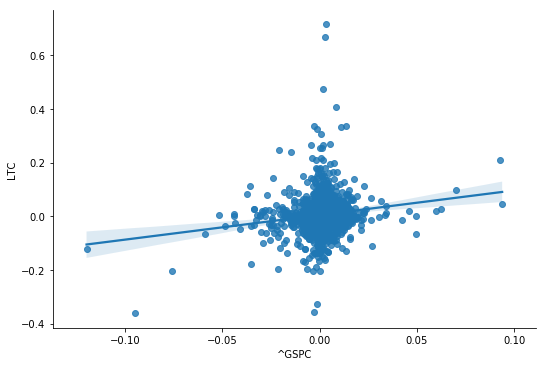

In [99]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='^GSPC', y='LTC', data=yfdf_daily_return, aspect=1.5, fit_reg=True)